# Game recommender
The goal of this project is to create a model that can recommend video games to the user. if a user gives a game name as an input. the model will recommend some other similar type of games to the user. because it is a classification problem, I have used k-nearest neighbors (KNN) algorithm. KNN will group/cluster similar types of data point close to each other based on their features. for data preparation I have used NumPy, pandas, matplotlib and seaborn. for standardizing the data and modeling I have used sklearn library.



# About the data

the dataset used in this project is from <a href = "https://www.imdb.com/?ref_=nv_home">IMDB </a>. you can download the updated dataset from <a href = "https://www.imdb.com/interfaces/">here </a>


for this project I have downloaded two datasets from IMDb and merged them together. the datasets contain.

<ul><li>tconst (string) - alphanumeric unique identifier of the title</li><li>titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)</li><li>primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release</li><li>originalTitle (string) - original title, in the original language</li><li>isAdult (boolean) - 0: non-adult title; 1: adult title</li><li>startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year </li><li>endYear (YYYY) – TV Series end year. ‘\N’ for all other title types</li><li>runtimeMinutes – primary runtime of the title, in minutes</li><li>genres (string array) – includes up to three genres associated with the title</li>
<li>averageRating – weighted average of all the individual user ratings</li><li>numVotes - number of votes the title has received</li></ul>

<br>







In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Preparing data

In [2]:
ratings_df = pd.read_table('title.ratings.tsv.gz')
ratings_df

,tconst,averageRating,numVotes
0,tt0000001,5.7,1910
1,tt0000002,5.8,256
2,tt0000003,6.5,1715
3,tt0000004,5.6,169
4,tt0000005,6.2,2530
...,...,...,...
1260589,tt9916690,6.5,6
1260590,tt9916720,5.2,257
1260591,tt9916730,8.4,6
1260592,tt9916766,6.8,21


In [3]:
basics_df = pd.read_table('title.basics.tsv.gz')
basics_df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6388\228370564.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  basics_df = pd.read_table('title.basics.tsv.gz')


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
9244020,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
9244021,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
9244022,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
9244023,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


#### Merging both data frames

In [4]:
merged_df = pd.merge(basics_df,ratings_df,how='outer')
merged_df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1910.0
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",5.8,256.0
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1715.0
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",5.6,169.0
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2530.0
...,...,...,...,...,...,...,...,...,...,...,...
9244021,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family",NaN,NaN
9244022,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family",NaN,NaN
9244023,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short,NaN,NaN
9244024,tt9916880,tvEpisode,Horrid Henry Knows It All,Horrid Henry Knows It All,0,2014,\N,10,"Adventure,Animation,Comedy",NaN,NaN


## Cleaning data

In [5]:
merged_df.groupby('titleType').count()

,tconst,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
titleType,,,,,,,,,,
movie,621980,621980,621980,621980,621980,621980,621980,621980,282566,282566
short,890751,890751,890751,890751,890751,890751,890751,890751,143518,143518
tvEpisode,6970082,6970071,6970071,6970082,6970082,6970082,6970082,6970072,611424,611424
tvMiniSeries,45241,45241,45241,45241,45241,45241,45241,45241,13896,13896
tvMovie,137621,137621,137621,137621,137621,137621,137621,137621,48906,48906
tvPilot,2,2,2,2,2,2,2,2,0,0
tvSeries,231477,231477,231477,231477,231477,231477,231477,231477,83439,83439
tvShort,10673,10673,10673,10673,10673,10673,10673,10673,2468,2468
tvSpecial,38454,38454,38454,38454,38454,38454,38454,38454,10546,10546


#### for a video game recommender I only need 'videoGame' titleType so, a new dataframe 'game_df' is made with only the video game title type

In [6]:
game_df = merged_df[merged_df['titleType'] == 'videoGame'].copy()
game_df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
82522,tt0084376,videoGame,"MysteryDisc: Murder, Anyone?","MysteryDisc: Murder, Anyone?",0,1982,\N,\N,"Adventure,Crime,Mystery",6.1,38.0
84077,tt0085982,videoGame,MysteryDisc: Many Roads to Murder,MysteryDisc: Many Roads to Murder,0,1983,\N,\N,"Adventure,Crime,Mystery",NaN,NaN
102633,tt0105000,videoGame,Night Trap,Night Trap,0,1992,\N,\N,"Adventure,Horror,Mystery",6.3,357.0
107359,tt0109865,videoGame,Gabriel Knight: Sins of the Fathers,Gabriel Knight: Sins of the Fathers,0,1993,\N,\N,"Adventure,Drama,Horror",9.1,686.0
107751,tt0110267,videoGame,King's Quest VII: The Princeless Bride,King's Quest VII: The Princeless Bride,0,1994,\N,\N,"Adventure,Fantasy",7.6,203.0
...,...,...,...,...,...,...,...,...,...,...,...
9242289,tt9913072,videoGame,Brain Age Express: Math,Brain Age Express: Math,0,2008,\N,\N,Family,NaN,NaN
9242301,tt9913096,videoGame,Brain Age Express: Arts & Letters,Brain Age Express: Arts & Letters,0,2008,\N,\N,\N,NaN,NaN
9242428,tt9913388,videoGame,Brain Age Express: Sudoku,Brain Age Express: Sudoku,0,2009,\N,\N,\N,NaN,NaN
9243586,tt9915932,videoGame,Aero Dancing F,Aero Dancing F,0,2000,\N,\N,\N,NaN,NaN


In [7]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32292 entries, 82522 to 9243648
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          32292 non-null  object 
 1   titleType       32292 non-null  object 
 2   primaryTitle    32292 non-null  object 
 3   originalTitle   32292 non-null  object 
 4   isAdult         32292 non-null  object 
 5   startYear       32292 non-null  object 
 6   endYear         32292 non-null  object 
 7   runtimeMinutes  32292 non-null  object 
 8   genres          32292 non-null  object 
 9   averageRating   13651 non-null  float64
 10  numVotes        13651 non-null  float64
dtypes: float64(2), object(9)
memory usage: 3.0+ MB


now the new game_df has 32292 entries of game

### checking for null / NaN


<AxesSubplot:>

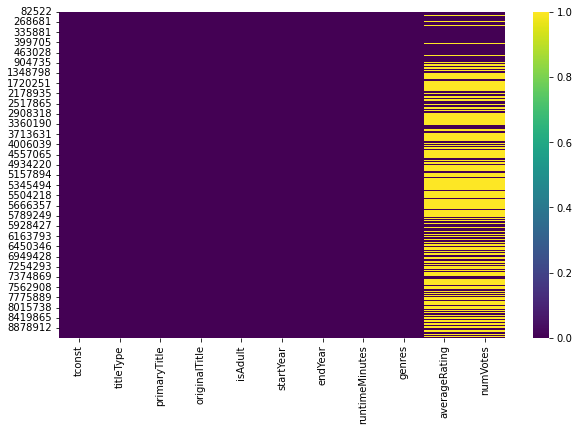

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(data=game_df.isnull(),cmap='viridis')

In [9]:
game_df.isnull().sum()

tconst                0
titleType             0
primaryTitle          0
originalTitle         0
isAdult               0
startYear             0
endYear               0
runtimeMinutes        0
genres                0
averageRating     18641
numVotes          18641
dtype: int64

#### looks like there are 18641 entries in the data frame with null values. more than half of the rating and votes data are missing. I cannot just drop those columns because they can be useful for the model later on.
<br>

tconst = some kind of unique identifier string for each entry

originalTitle = almost same as primary Title

endYear = games don’t have an end year. this column is for series

runtimeMinutes = games don’t have a runtime. this column is for movies
<br>
<br>



#### I don’t need tconst, originalTitle, endYear, runtimeMinutes and titleType becuse they are not holding any numeric values or useful information to make new features. so, I am going to drop those columns

In [10]:
game_df.drop(['tconst', 'originalTitle', 'endYear', 'runtimeMinutes','titleType'],axis=1,inplace=True)
game_df.head()

,primaryTitle,isAdult,startYear,genres,averageRating,numVotes
82522,"MysteryDisc: Murder, Anyone?",0,1982,"Adventure,Crime,Mystery",6.1,38.0
84077,MysteryDisc: Many Roads to Murder,0,1983,"Adventure,Crime,Mystery",NaN,NaN
102633,Night Trap,0,1992,"Adventure,Horror,Mystery",6.3,357.0
107359,Gabriel Knight: Sins of the Fathers,0,1993,"Adventure,Drama,Horror",9.1,686.0
107751,King's Quest VII: The Princeless Bride,0,1994,"Adventure,Fantasy",7.6,203.0


#### there are some \N strings in the startYear column

In [11]:
game_df[game_df['startYear']==r'\N']


,primaryTitle,isAdult,startYear,genres,averageRating,numVotes
991748,Shadow Stalkers,0,\N,"Action,Adventure,Thriller",NaN,NaN
1009050,Long Live the King,0,\N,Fantasy,NaN,NaN
1403515,Grand Poo World,0,\N,Adventure,NaN,NaN
1428171,Unicorn Game,0,\N,Adventure,NaN,NaN
1453499,X2: No Relief,0,\N,"Action,Sci-Fi",NaN,NaN
...,...,...,...,...,...,...
9012626,Project Borealis,0,\N,"Action,Adventure,Horror",NaN,NaN
9070339,Fallout 4: Capital Wasteland,0,\N,"Action,Adventure,Sci-Fi",NaN,NaN
9111863,Requiem,0,\N,Fantasy,NaN,NaN
9217646,Into Sominia: A Project,0,\N,Fantasy,NaN,NaN


#### the year column has 550 entries with \N values. I will drop those entries. also, the column has string type data. I also need to convert the column into integer values so that a model can use that column

In [12]:

def toInt(x):
    if x == r"\N":
        return np.nan
    else:
        return int(x)

game_df['Year'] = game_df['startYear'].apply(lambda x: toInt(x))

game_df.drop('startYear',axis=1,inplace=True)
game_df.dropna(subset=['Year'],inplace=True)

In [13]:
game_df[game_df['Year']==r'\N']['Year'].count()

0

#### also removing /N from genres column

In [14]:
def get_nan(x):
    if x == r"\N":
        return np.nan
    else:
        return x

game_df['genres'] = game_df['genres'].apply(lambda x: get_nan(x))


game_df.dropna(subset=['genres'],inplace=True)
game_df[game_df['genres']==r'\N']['genres'].count()

0


#### if a game is popular, it will get more player hence get more votes and from that vote average ratings is counted. there must be a lot of games that is not popular or not good but have a rating of 8 or 9 because some small number of people decided to give good ratings. if I keep those games in the dataset and feed it to the model it will not give a good recommendation because then good games will be mixed up with the bad or not popular ones. therefore, it is bater to discard games with less votes.



In [15]:
game_df.describe()

,averageRating,numVotes,Year
count,12646.000000,12646.000000,26961.000000
mean,6.944931,383.657757,2005.204666
std,1.255438,1803.338996,12.415866
min,1.000000,5.000000,1948.000000
25%,6.300000,15.000000,1996.000000
50%,7.200000,38.000000,2008.000000
75%,7.800000,137.000000,2016.000000
max,9.800000,61136.000000,2027.000000




#### from the above description the std is very high for the number of votes column that means the variation in that column data is huge
#### also, the year column has a max value of 2027 that means the data set contains entries of unreleased games. what I also don’t want



In [16]:
game_df[game_df['Year']>2022]

,primaryTitle,isAdult,genres,averageRating,numVotes,Year
1147858,Hollow Knight: Silk Song,0,"Action,Adventure",NaN,NaN,2023.0
1229918,The Legend of Zelda: Tears of the Kingdom,0,"Action,Adventure,Fantasy",NaN,NaN,2023.0
1419311,Y++,0,Drama,NaN,NaN,2023.0
1419321,Devil's Life,0,Drama,NaN,NaN,2023.0
1670828,Diablo IV,0,"Action,Adventure,Fantasy",NaN,NaN,2023.0
...,...,...,...,...,...,...
8019462,Who Stole the Moon? Puzzles of Mystery,0,Animation,NaN,NaN,2023.0
8295695,Pikmin 4,0,"Action,Adventure,Family",NaN,NaN,2023.0
8414650,Starport Story,0,"Adventure,Sci-Fi",NaN,NaN,2023.0
8611684,The Elder Scrolls VI,0,"Action,Adventure,Fantasy",NaN,NaN,2027.0


#### Now I am going to get rid of unpopular games

In [17]:
games = game_df[game_df['numVotes']>100].copy()

#### a new data frame is created with the games that have more than 100 votes

In [18]:
games.describe()

,averageRating,numVotes,Year
count,3792.000000,3792.000000,3792.000000
mean,7.460021,1209.753692,2006.418776
std,1.078543,3141.807188,8.975111
min,1.000000,101.000000,1971.000000
25%,7.000000,165.000000,2000.000000
50%,7.600000,345.000000,2007.000000
75%,8.125000,966.000000,2014.000000
max,9.800000,61136.000000,2022.000000


#### standard deviation is slightly better now

In [19]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3792 entries, 102633 to 9241262
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   primaryTitle   3792 non-null   object 
 1   isAdult        3792 non-null   object 
 2   genres         3792 non-null   object 
 3   averageRating  3792 non-null   float64
 4   numVotes       3792 non-null   float64
 5   Year           3792 non-null   float64
dtypes: float64(3), object(3)
memory usage: 207.4+ KB


 #### converting isAdult column to numeric values 

In [20]:
games['isAdult'] = games['isAdult'].apply(lambda x: int(x))

In [21]:
games.rename(columns={'primaryTitle':'Title'},inplace=True)
games.reset_index(inplace=True,drop=True)
games.head()

,Title,isAdult,genres,averageRating,numVotes,Year
0,Night Trap,0,"Adventure,Horror,Mystery",6.3,357.0,1992.0
1,Gabriel Knight: Sins of the Fathers,0,"Adventure,Drama,Horror",9.1,686.0,1993.0
2,King's Quest VII: The Princeless Bride,0,"Adventure,Fantasy",7.6,203.0,1994.0
3,Wing Commander III: Heart of the Tiger,0,"Action,Adventure,Sci-Fi",8.8,796.0,1994.0
4,Mr. Payback: An Interactive Movie,0,"Adventure,Comedy,Sci-Fi",4.7,103.0,1995.0


#### checking for null

<AxesSubplot:>

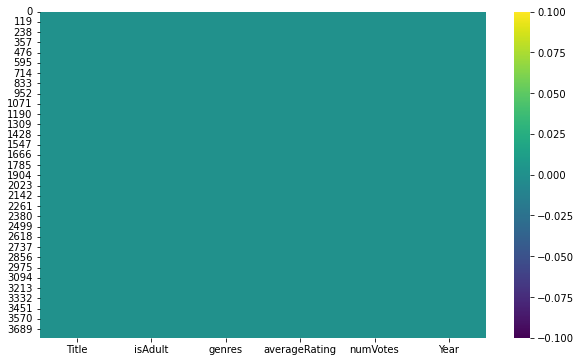

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(data=games.isnull(),cmap='viridis')

In [23]:
games.isnull().sum()

Title            0
isAdult          0
genres           0
averageRating    0
numVotes         0
Year             0
dtype: int64

no null values remaining

## Data visualization

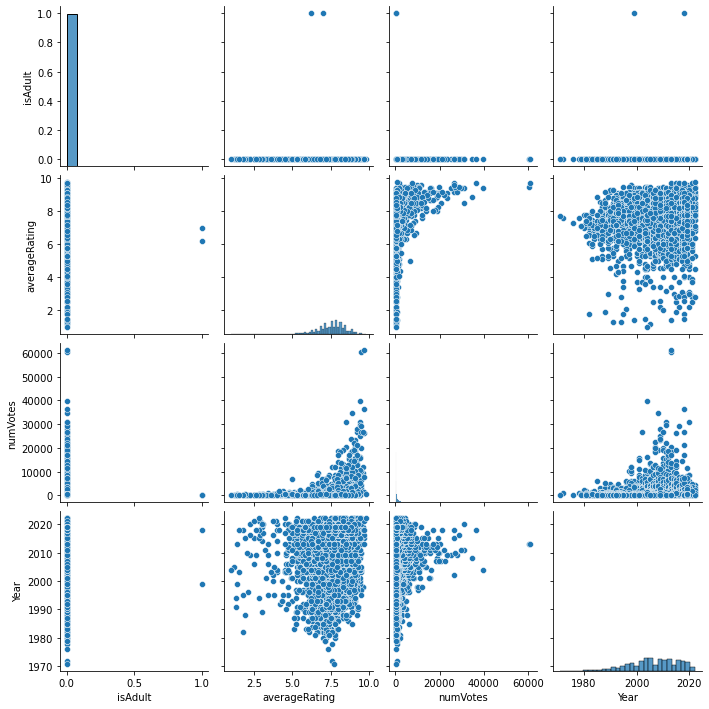

In [24]:
sns.pairplot(games)

#### top 10 games of all time

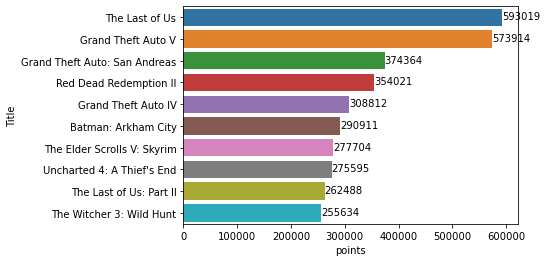

In [25]:
data = games.copy()
def getPoints(x):
    return x[0]*x[1]
data['points'] = data[['averageRating','numVotes']].apply(lambda x: getPoints(x),axis=1)
top_ten_all = data.sort_values(by='points', ascending=False).head(10)
ax = sns.barplot(data=top_ten_all,x='points',y='Title')
for i in ax.patches:
    ax.text(i.get_width()+.5, i.get_y()+.5,str(round(i.get_width())),color='black')
plt.show()


#### top ten games of this year (2022)

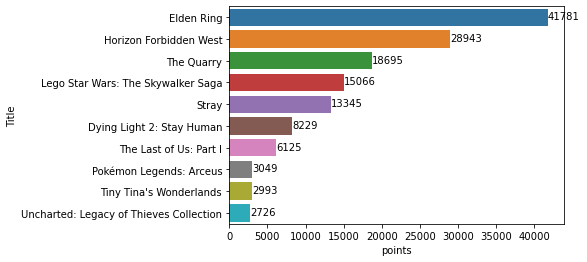

In [26]:
top_ten_2022 = data[data['Year']==2022].sort_values(by='points', ascending=False).head(10)
ax = sns.barplot(data=top_ten_2022,x='points',y='Title')
for i in ax.patches:
    ax.text(i.get_width()+.5, i.get_y()+.5,str(round(i.get_width())),color='black')
plt.show()

#### call of duty games by best to worst

In [27]:
def get_cod(x):    
    if('Call of Duty' in x):
        return True
    else:
        return False
data['isCod'] = data['Title'].apply(lambda x: get_cod(x))

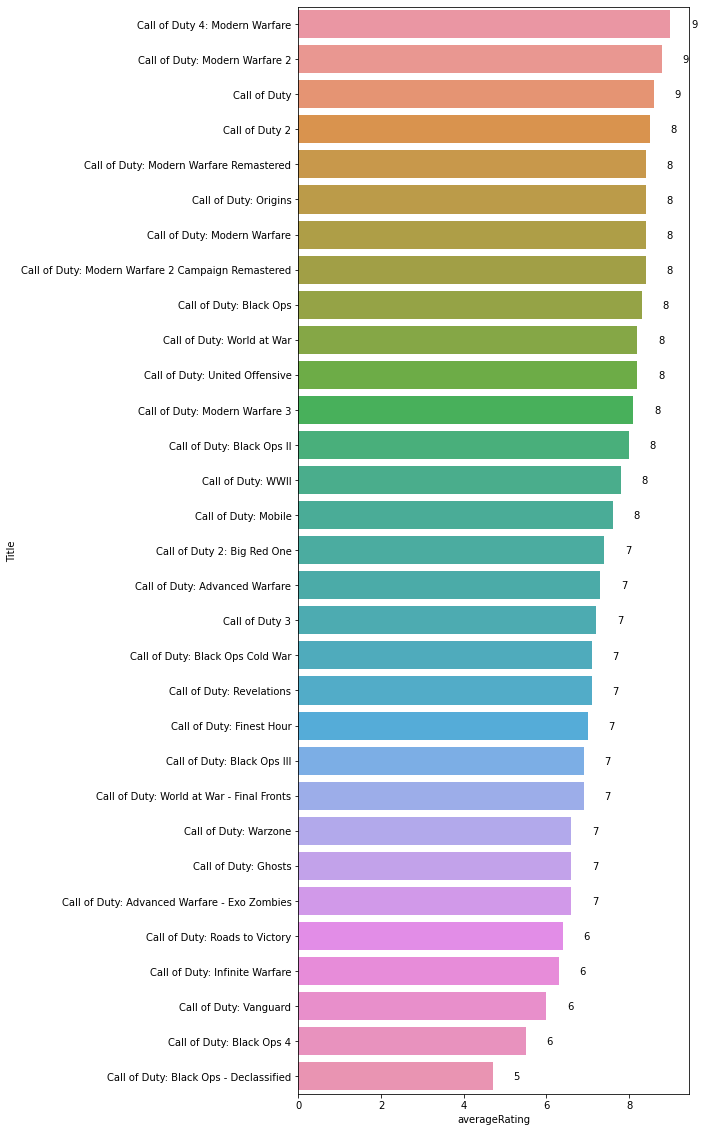

In [28]:
plt.figure(figsize=(7,20))
cod = data[data['isCod'] == True].sort_values(by='averageRating', ascending=False)
ax = sns.barplot(data=cod,x='averageRating',y='Title')
for i in ax.patches:
    ax.text(i.get_width()+.5, i.get_y()+.5,str(round(i.get_width())),color='black')
plt.show()

#### averageRating distribution

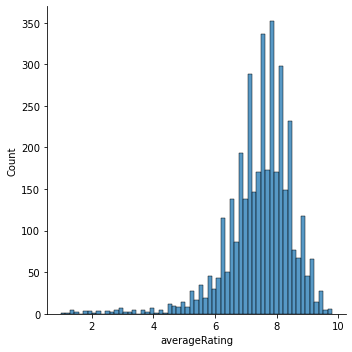

In [29]:
sns.displot(data=games,x='averageRating')

#### relationship between ratings and votes

<AxesSubplot:xlabel='averageRating', ylabel='numVotes'>

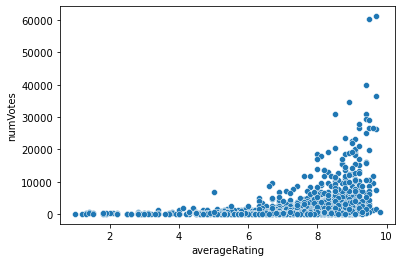

In [30]:
sns.scatterplot(data=games,x='averageRating',y='numVotes')

games that are getting more votes tends to get better ratings. it seems there are also some outliers in this data like there are some games that got more than 60000 votes and a ratting of almost 10 that means those games must be really good. there is also a game that got somewhere between 6000 to 10000 votes but have a ratting between 4 - 5 that means it must be a bad game

In [31]:
games[games['numVotes'] > 60000]

,Title,isAdult,genres,averageRating,numVotes,Year
2676,Grand Theft Auto V,0,"Action,Crime,Drama",9.5,60412.0,2013.0
2696,The Last of Us,0,"Action,Adventure,Drama",9.7,61136.0,2013.0


In [32]:
games[(((games['numVotes'] > 6000) & (games['numVotes'] < 10000)) & ((games['averageRating'] > 4) & (games['averageRating'] < 6))) ]

,Title,isAdult,genres,averageRating,numVotes,Year
3654,Fortnite,0,"Action,Adventure,Comedy",5.0,6730.0,2017.0


## Feature Engineering


#### Making new columns for every tags from genres column

In [33]:
games['genres'] = games['genres'].apply(lambda x: x.split(','))

In [34]:
games

,Title,isAdult,genres,averageRating,numVotes,Year
0,Night Trap,0,"[Adventure, Horror, Mystery]",6.3,357.0,1992.0
1,Gabriel Knight: Sins of the Fathers,0,"[Adventure, Drama, Horror]",9.1,686.0,1993.0
2,King's Quest VII: The Princeless Bride,0,"[Adventure, Fantasy]",7.6,203.0,1994.0
3,Wing Commander III: Heart of the Tiger,0,"[Action, Adventure, Sci-Fi]",8.8,796.0,1994.0
4,Mr. Payback: An Interactive Movie,0,"[Adventure, Comedy, Sci-Fi]",4.7,103.0,1995.0
...,...,...,...,...,...,...
3787,Steins;Gate Elite,0,"[Comedy, Drama, Romance]",8.6,165.0,2018.0
3788,Pokémon Shield,0,"[Action, Adventure, Fantasy]",6.8,516.0,2019.0
3789,Catherine: Full Body,0,"[Fantasy, Horror, Romance]",8.4,278.0,2019.0
3790,The Lego Movie 2 Videogame,0,"[Adventure, Animation, Family]",5.8,138.0,2019.0


In [35]:
newLst = []
def addAllLst(lst):
    global newLst
    newLst = newLst + lst

games['genres'].apply(lambda x: addAllLst(x))

0       None
1       None
2       None
3       None
4       None
        ... 
3787    None
3788    None
3789    None
3790    None
3791    None
Name: genres, Length: 3792, dtype: object

In [36]:
gameTegs = list(set(newLst))

In [37]:
gameTegs.sort()
gameTegs

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [38]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [39]:

def getTegs(lst):
    map_ = {gameTegs[i]: 0 for i in range(0, len(gameTegs))}
    for tag in lst:
        map_[tag] = 1
    return pd.Series(map_)  
games[gameTegs] = games['genres'].apply(lambda lst:getTegs(lst))
games.drop('genres',axis=1,inplace=True)
games.head()


,Title,isAdult,averageRating,numVotes,Year,Action,Adult,Adventure,Animation,Biography,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,Night Trap,0,6.3,357.0,1992.0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,Gabriel Knight: Sins of the Fathers,0,9.1,686.0,1993.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,King's Quest VII: The Princeless Bride,0,7.6,203.0,1994.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Wing Commander III: Heart of the Tiger,0,8.8,796.0,1994.0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Mr. Payback: An Interactive Movie,0,4.7,103.0,1995.0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


# Standardizing data

In [40]:
games.reset_index(inplace=True,drop=True)
from sklearn.preprocessing import StandardScaler
Standard_Scaler = StandardScaler()
df = games.copy()
df = Standard_Scaler.fit_transform(games.drop(['Title'],axis=1))

# Training model

In [41]:
from sklearn.cluster import KMeans
from sklearn import neighbors
model = neighbors.NearestNeighbors(n_neighbors=10,algorithm='ball_tree')
model.fit(df)
dist, idlist  = model.kneighbors(df)

# Testing model

In [42]:
def GameRecommender(game_name):
    game_list_name = []
    game_id = games[games['Title'] == game_name].index
    game_id = game_id[0]
    for newid in idlist[game_id]:
        game_list_name.append(games.loc[newid]['Title'])
    return game_list_name
    
GameNames = GameRecommender("Grand Theft Auto: San Andreas")
GameNames

['Grand Theft Auto: San Andreas',
 'Red Dead Redemption II',
 'Batman: Arkham City',
 'Grand Theft Auto IV',
 'Batman: Arkham Asylum',
 'Red Dead Redemption',
 'Grand Theft Auto: Vice City',
 'The Elder Scrolls V: Skyrim',
 'The Last of Us: Part II',
 "Uncharted 4: A Thief's End"]